# UNICEF MICS Survey data analysis

Understanding features that can predict why a caretaker might have a vaccination card using classification algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from  sklearn.preprocessing import  StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import classification_report

Data collected at the children's level (MICS Under Five Children's questionnaire modules: Under-five child information panel, Child's age, Birth registration, Early childhood development, Breastfeeding , Care of illness, Immunization, Under-five child selected for blood test.)

Dataset produced by UNICEF and Central Statistics Organization

In [2]:
#importing ch.csv which was converted from .sav format in R. Check get_Congo_to_csv.R file
#Set low_memory = False to avoid the warning about column numbers having mixed type values.
## 100,104,106,114,115,116,117,118,120,122,123,125,126,127,131,133,134,136,152,153,168

ch_df = pd.read_csv('ch_pak.csv',low_memory=False)

In [3]:
#Convert column with mixed types to object type.

ch_df.iloc[:,[100,104,106,114,115,116,117,118,120,122,123,125,126,127,131,133,134,136,152,153,168]] = ch_df.iloc[:,[100,104,106,114,115,116,117,118,120,122,123,125,126,127,131,133,134,136,152,153,168]].astype(object)
g = ch_df.columns.to_series().groupby(ch_df.dtypes).groups
g

{dtype('int64'): Index([u'HH1', u'HH2', u'LN', u'UF1', u'UF2', u'UF4', u'UF6', u'UF7', u'UF8D',
        u'UF8M', u'UF8Y', u'UF9', u'UF10', u'UF11', u'HH6', u'HH7', u'HL4',
        u'CDOI', u'melevel', u'division', u'windex5'],
       dtype='object'),
 dtype('float64'): Index([u'UF12H', u'UF12M', u'UF13H', u'UF13M', u'AG1D', u'AG1M', u'AG1Y',
        u'AG2', u'BR1', u'BR1A',
        ...
        u'CAGE', u'CAGE_6', u'CAGE_11', u'CAGED', u'chweight', u'wscore',
        u'wscoreu', u'windex5u', u'wscorer', u'windex5r'],
       dtype='object', length=226),
 dtype('O'): Index([u'EC7AA', u'EC7AB', u'EC7AX', u'EC7AY', u'EC7BA', u'EC7BB', u'EC7BX',
        u'EC7BY', u'EC7CA', u'EC7CB', u'EC7CX', u'EC7CY', u'EC7DA', u'EC7DB',
        u'EC7DX', u'EC7DY', u'EC7EA', u'EC7EB', u'EC7EX', u'EC7EY', u'EC7FA',
        u'EC7FB', u'EC7FX', u'EC7FY', u'IM3BD', u'IM3P0M', u'IM3P1D', u'IM3P3Y',
        u'IM3T1D', u'IM3T1M', u'IM3T1Y', u'IM3T2D', u'IM3T2Y', u'IM3T3M',
        u'IM3T3Y', u'IM3C1M', u'IM3C1Y', 

In [4]:
ch_df.describe()

,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,CAGED,chweight,melevel,division,wscore,windex5,wscoreu,windex5u,wscorer,windex5r
count,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,...,16605.000000,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,7932.000000,7932.000000,11679.000000,11679.000000
mean,428.431964,10.352275,7.726198,428.431964,10.352275,7.726198,4.172134,46.795008,15.810747,4.124199,...,1006.465522,0.916998,1.843329,2.785785,-0.146187,2.204219,-0.147429,1.800933,0.004140,2.456375
std,269.415361,5.741518,4.224276,269.415361,5.741518,4.224276,3.794440,29.048289,8.558811,1.372228,...,1108.143834,0.847431,1.406195,1.308579,0.896322,1.371325,0.930452,1.501089,0.912139,1.595279
min,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,-1.777233,0.000000,-3.030231,0.000000,-1.493800,0.000000
25%,192.000000,5.000000,5.000000,192.000000,5.000000,5.000000,2.000000,20.000000,8.000000,3.000000,...,436.000000,0.414079,1.000000,2.000000,-0.931318,1.000000,-0.547089,1.000000,-0.684929,1.000000
50%,399.000000,10.000000,7.000000,399.000000,10.000000,7.000000,2.000000,44.000000,16.000000,4.000000,...,922.000000,0.688373,1.000000,3.000000,-0.168406,2.000000,0.000000,1.000000,-0.029224,2.000000
75%,653.000000,15.000000,9.000000,653.000000,15.000000,9.000000,5.000000,73.000000,23.000000,5.000000,...,1373.000000,1.125123,2.000000,4.000000,0.543420,3.000000,0.495220,3.000000,0.439809,4.000000
max,975.000000,20.000000,42.000000,975.000000,20.000000,42.000000,41.000000,99.000000,31.000000,8.000000,...,9999.000000,8.381366,9.000000,5.000000,2.438155,5.000000,1.781103,5.000000,4.279130,5.000000


In [5]:
columnNumbers = [x for x in range(ch_df.shape[1])]  # list of columns' integer indices

#columnNumbers.remove(0) #removing column integer index 0
ch_df = ch_df.iloc[:, columnNumbers] #return all columns except 0th column
ch_df.head()

,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,CAGED,chweight,melevel,division,wscore,windex5,wscoreu,windex5u,wscorer,windex5r
0,1,2,7,1,2,7,2,16,21,4,...,1133.0,0.613236,1,1,-1.537632,1,-2.735402,1.0,NaN,NaN
1,1,3,9,1,3,9,2,16,21,4,...,1464.0,0.613236,1,1,-0.643725,2,-1.635452,1.0,NaN,NaN
2,1,4,4,1,4,4,2,17,21,4,...,1376.0,0.613236,1,1,-0.992865,1,-2.065068,1.0,NaN,NaN
3,1,4,5,1,4,5,2,17,21,4,...,310.0,0.613236,1,1,-0.992865,1,-2.065068,1.0,NaN,NaN
4,1,4,6,1,4,6,2,17,21,4,...,310.0,0.613236,1,1,-0.992865,1,-2.065068,1.0,NaN,NaN


In [6]:
wm_df = pd.read_csv('wm_pak.csv', low_memory = False)

In [7]:
wm_df.iloc[:,[53,81,102,103,105,121,128,129,146,149]] = wm_df.iloc[:,[53,81,102,103,105,121,128,129,146,149]].astype(object)
g = wm_df.columns.to_series().groupby(wm_df.dtypes).groups
g

{dtype('int64'): Index([u'HH1', u'HH2', u'LN', u'WM1', u'WM2', u'WM4', u'WM5', u'WM6D', u'WM6M',
        u'WM6Y', u'WM7', u'WM8', u'WM9', u'HH6', u'HH7', u'division',
        u'windex5'],
       dtype='object'),
 dtype('float64'): Index([u'WM10H', u'WM10M', u'WM11H', u'WM11M', u'WB1M', u'WB1Y', u'WB2',
        u'WB3', u'WB5', u'WB7',
        ...
        u'CEB', u'CSURV', u'CDEAD', u'wmweight', u'welevel', u'wscore',
        u'wscoreu', u'windex5u', u'wscorer', u'windex5r'],
       dtype='object', length=171),
 dtype('O'): Index([u'CM8', u'CM13', u'MN2A', u'MN2B', u'MN2C', u'MN2D', u'MN2F', u'MN2G',
        u'MN2H', u'MN2X',
        ...
        u'TA8E', u'TA8X', u'TA12A', u'TA12D', u'TA12E', u'TA12F', u'TA12G',
        u'TA12H', u'TA12I', u'TA12X'],
       dtype='object', length=114)}

In [8]:
columnNumbers = [x for x in range(wm_df.shape[1])]  # list of columns' integer indices

#columnNumbers.remove(0) #removing column integer index 0
wm_df = wm_df.iloc[:, columnNumbers] #return all columns except 0th column
wm_df.head()

,HH1,HH2,LN,WM1,WM2,WM4,WM5,WM6D,WM6M,WM6Y,...,CDEAD,wmweight,welevel,division,wscore,windex5,wscoreu,windex5u,wscorer,windex5r
0,1,1,7,1,1,7,17,21,4,2014,...,0.0,0.558521,1.0,1,0.330435,3,-0.436749,1.0,NaN,NaN
1,1,1,8,1,1,8,17,21,4,2014,...,0.0,0.558521,1.0,1,0.330435,3,-0.436749,1.0,NaN,NaN
2,1,1,9,1,1,9,17,21,4,2014,...,0.0,0.558521,1.0,1,0.330435,3,-0.436749,1.0,NaN,NaN
3,1,2,2,1,2,2,16,21,4,2014,...,0.0,0.558521,1.0,1,-1.537632,1,-2.735402,1.0,NaN,NaN
4,1,3,2,1,3,2,16,21,4,2014,...,4.0,0.558521,1.0,1,-0.643725,2,-1.635452,1.0,NaN,NaN


In [9]:
print ch_df['HH1']
ch_wm_df = ch_df.merge(wm_df, on = ['HH1','HH2'])

0          1
1          1
2          1
3          1
4          1
5          1
6          1
7          1
8          1
9          1
10         1
11         1
12         1
13         1
14         1
15         1
16         2
17         2
18         2
19         2
20         2
21         2
22         2
23         2
24         2
25         2
26         2
27         2
28         2
29         2
        ... 
18078    970
18079    970
18080    971
18081    971
18082    971
18083    971
18084    972
18085    972
18086    972
18087    972
18088    972
18089    973
18090    973
18091    973
18092    973
18093    973
18094    973
18095    973
18096    973
18097    973
18098    973
18099    973
18100    973
18101    974
18102    974
18103    975
18104    975
18105    975
18106    975
18107    975
Name: HH1, dtype: int64


In [10]:
ch_wm_df.head()

,HH1,HH2,LN_x,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,CDEAD,wmweight,welevel,division_y,wscore_y,windex5_y,wscoreu_y,windex5u_y,wscorer_y,windex5r_y
0,1,2,7,1,2,7,2,16,21,4,...,0.0,0.558521,1.0,1,-1.537632,1,-2.735402,1.0,NaN,NaN
1,1,3,9,1,3,9,2,16,21,4,...,4.0,0.558521,1.0,1,-0.643725,2,-1.635452,1.0,NaN,NaN
2,1,3,9,1,3,9,2,16,21,4,...,0.0,0.558521,3.0,1,-0.643725,2,-1.635452,1.0,NaN,NaN
3,1,4,4,1,4,4,2,17,21,4,...,0.0,0.558521,1.0,1,-0.992865,1,-2.065068,1.0,NaN,NaN
4,1,4,5,1,4,5,2,17,21,4,...,0.0,0.558521,1.0,1,-0.992865,1,-2.065068,1.0,NaN,NaN


In [11]:
hh_df = pd.read_csv('hh_pak.csv', low_memory = False)

In [12]:
hh_df.iloc[:,[36,41]] = hh_df.iloc[:,[36,41]].astype(object)
g = hh_df.columns.to_series().groupby(hh_df.dtypes).groups
g

{dtype('int64'): Index([u'HH1', u'HH2', u'HH3', u'HH4', u'HH5D', u'HH5M', u'HH5Y', u'HH6',
        u'HH7', u'HH8A', u'HH8C', u'HH9', u'HH16', u'HH17', u'division',
        u'windex5', u'PSU', u'stratum'],
       dtype='object'),
 dtype('float64'): Index([u'HH10', u'HH11', u'HH12', u'HH13', u'HH14', u'HH15', u'HH15A',
        u'HH15B', u'HH18H', u'HH18M',
        ...
        u'ehweight', u'esweight', u'ceweight', u'saweight', u'helevel',
        u'wscore', u'wscoreu', u'windex5u', u'wscorer', u'windex5r'],
       dtype='object', length=214),
 dtype('O'): Index([u'CL5', u'CL7D', u'IR2A', u'IR2B', u'IR2C', u'IR2X', u'IR2Z', u'WS7A',
        u'WS7B', u'WS7C', u'WS7D', u'WS7E', u'WS7F', u'WS7G', u'WS7X', u'WS7Z',
        u'HW3BA', u'HW3BB', u'HW3BC', u'HW3BD', u'HW5BA', u'HW5BB', u'HW5BC',
        u'HW5BD', u'WQ10D', u'WQ12AD', u'WQ14D', u'WQ19D', u'WQ21BD', u'WQ23D',
        u'WQ26D', u'WQ29D'],
       dtype='object')}

In [13]:
columnNumbers = [x for x in range(hh_df.shape[1])]  # list of columns' integer indices

#columnNumbers.remove(0) #removing column integer index 0
hh_df = hh_df.iloc[:, columnNumbers] #return all columns except 0th column
hh_df.head()

,HH1,HH2,HH3,HH4,HH5D,HH5M,HH5Y,HH6,HH7,HH8A,...,division,helevel,wscore,windex5,wscoreu,windex5u,wscorer,windex5r,PSU,stratum
0,1,1,17,15,21,4,2014,1,1,2,...,1,2.0,0.330435,3,-0.436749,1.0,NaN,NaN,1,1
1,1,2,16,15,21,4,2014,1,1,2,...,1,1.0,-1.537632,1,-2.735402,1.0,NaN,NaN,1,1
2,1,3,16,15,21,4,2014,1,1,1,...,1,2.0,-0.643725,2,-1.635452,1.0,NaN,NaN,1,1
3,1,4,17,15,21,4,2014,1,1,2,...,1,1.0,-0.992865,1,-2.065068,1.0,NaN,NaN,1,1
4,1,5,17,15,21,4,2014,1,1,2,...,1,1.0,-1.004787,1,-2.079738,1.0,NaN,NaN,1,1


In [14]:
df = ch_wm_df.merge(hh_df, on = ['HH1','HH2'])

In [15]:
df.head()

,HH1,HH2,LN_x,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,division,helevel,wscore,windex5,wscoreu,windex5u,wscorer,windex5r,PSU,stratum
0,1,2,7,1,2,7,2,16,21,4,...,1,1.0,-1.537632,1,-2.735402,1.0,NaN,NaN,1,1
1,1,3,9,1,3,9,2,16,21,4,...,1,2.0,-0.643725,2,-1.635452,1.0,NaN,NaN,1,1
2,1,3,9,1,3,9,2,16,21,4,...,1,2.0,-0.643725,2,-1.635452,1.0,NaN,NaN,1,1
3,1,4,4,1,4,4,2,17,21,4,...,1,1.0,-0.992865,1,-2.065068,1.0,NaN,NaN,1,1
4,1,4,5,1,4,5,2,17,21,4,...,1,1.0,-0.992865,1,-2.065068,1.0,NaN,NaN,1,1


Remove ID columns

In [16]:
df = df.loc[:, ~df.columns.str.startswith('UF')]
df = df.loc[:, ~df.columns.str.startswith('HH')]
df = df.loc[:, ~df.columns.str.startswith('LN')]
df.drop('AN1', axis=1, inplace=True)

In [17]:
df['IM1'].unique()

array([ nan,   3.,   1.,   2.,   9.])

In [18]:
#Set the target to column IM1 - Has the card and the card is seen
#Seperate the target column from the df.

df['has_card'] = np.where(df['IM1'] == 1, 1,0)

In [19]:
df = df.loc[:, ~df.columns.str.startswith('IM')]

# Handling data imbalance by upsampling the minority class

In [20]:
df_majority = df[df.has_card == 0]
df_minority = df[df.has_card == 1]

print(len(df_majority))
print(len(df_minority))

32157
6298


In [21]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace= True,     # sample with replacement
                                 n_samples=32157,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.has_card.value_counts()

1    32157
0    32157
Name: has_card, dtype: int64

In [22]:
df = df_upsampled

In [23]:
#One hot encoding of categorical values using get_dummies function

dummies = pd.get_dummies(df)
dummies.head()

,AG1D,AG1M,AG1Y,AG2,BR1,BR1A,BR2,BR3,BR4,EC1,...,HW5BD_?,HW5BD_D,WQ10D_H,WQ12AD_DH,WQ14D_DH,WQ19D_DS,WQ21BD_B,WQ23D_H,WQ26D_S,WQ29D_B
0,99.0,3.0,2011.0,3.0,3.0,NaN,2.0,2.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
1,98.0,4.0,2010.0,4.0,3.0,NaN,2.0,2.0,NaN,0.0,...,0,0,1,0,0,0,0,1,1,0
2,98.0,4.0,2010.0,4.0,3.0,NaN,2.0,2.0,NaN,0.0,...,0,0,1,0,0,0,0,1,1,0
3,98.0,7.0,2010.0,3.0,3.0,NaN,2.0,2.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
4,98.0,6.0,2013.0,0.0,3.0,NaN,2.0,2.0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#Replace NaN with 0

dummies = dummies.fillna(0)

In [25]:
target = df['has_card']
target.unique()

array([0, 1], dtype=int64)

1	Yes	    - 6021   
2	No	    - 1279  
8	DK	    - 102	  
9	Missing - 3

In [26]:
#Creating a binary variable since by coding Yes to 1 and any other response as 0.

y=['has_card']
dummy_vars =dummies.columns.values.tolist()
X=[i for i in dummy_vars if i not in y]

# Logistic Regression Classifier

In [27]:
#Training the logistic regression model
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(dummies[X],dummies[y].values.ravel(), test_size=0.3, random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
feature_importance = abs(logreg.coef_[0])
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

In [29]:
feature_imp_data = list(zip(X_train, feature_importance))
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [30]:
people = people[0:20]
score = score[0:20]
x_pos = np.arange(len(people)) 

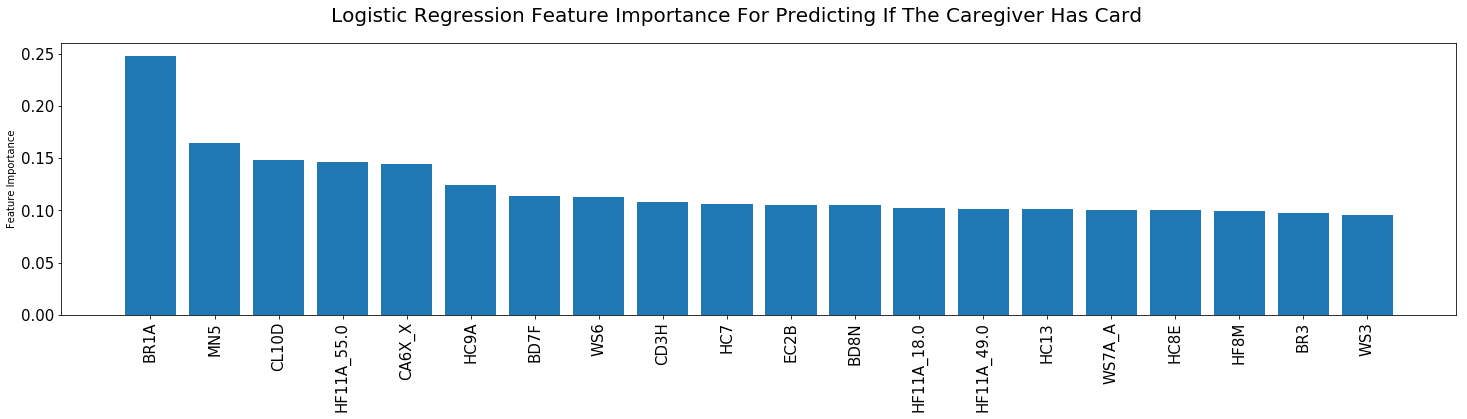

In [31]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Logistic Regression Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

In [32]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


In [33]:
#Overall classification report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.82      0.86      9598
          1       0.84      0.91      0.87      9697

avg / total       0.87      0.87      0.87     19295



# Random Forest Classifier

Random Forests is an ensemble model which uses a large number of strong decision trees through bagging.
Each decision tree is built on a subset of features and a subset of rows from the data.
The model combines all of them in order to smooth out their predictions

In [34]:
#Training the Random Forests model

X_train, X_test, y_train, y_test = train_test_split(dummies[X],dummies[y].values.ravel(), test_size=0.3, random_state=0)

In [35]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
rfc = RandomForestClassifier()

# Train the Classifier to take the training features and learn how they relate
# to the training y 
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [36]:
y_pred = rfc.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.98


In [37]:
#Overall classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.97      0.98      9598
          1       0.97      1.00      0.98      9697

avg / total       0.98      0.98      0.98     19295



Let's validate the results of Random Forests Model with kfold cross validation

In [38]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(rfc, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.979


In [39]:
feature_imp_data = list(zip(X_train, rfc.feature_importances_))

In [40]:
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [41]:
people = people[0:20]
score = score[0:20]
x_pos = np.arange(len(people)) 

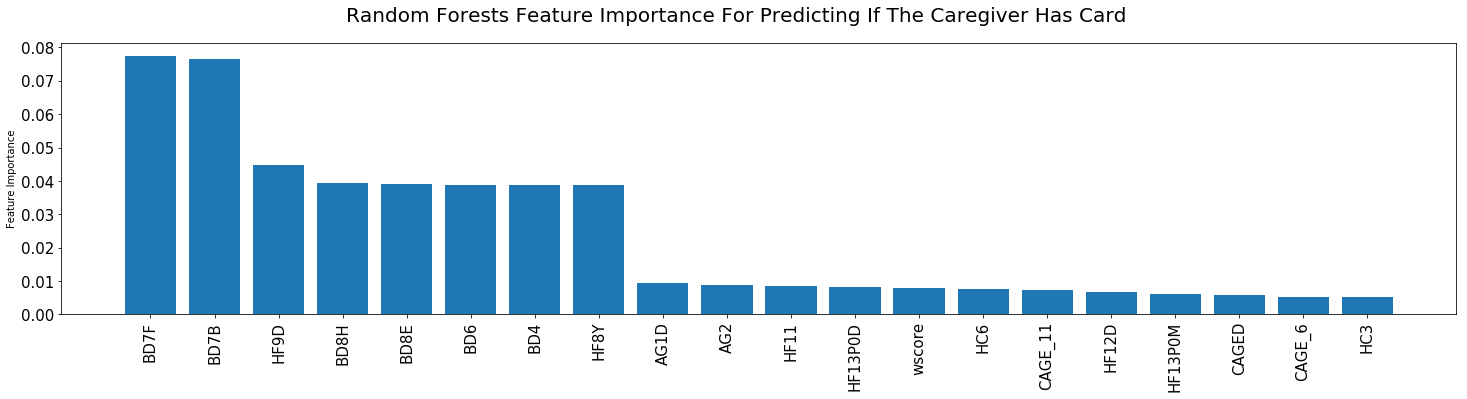

In [42]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Random Forests Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

# Gradient Boosting Decision Tree Classifier

Gradient Boosting Decision Trees is an ensemble model which uses a sequence of weak constrained decision trees through boosting.
Each tree is allowed a maximum depth and hence tuned and each tree tries to correct the predictions of the trees before it.

In [43]:
gbd = GradientBoostingClassifier()
gbd = gbd.fit(X_train, y_train)

In [ ]:
y_pred = gbd.predict(X_test)
print('Accuracy of gradient boosting decision tree classifier on test set: {:.2f}'.format(gbd.score(X_test, y_test)))

Accuracy of gradient boosting decision tree classifier on test set: 0.88


In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(gbd, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [ ]:
feature_imp_data = list(zip(X_train, gbd.feature_importances_))

In [ ]:
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [ ]:
people = people[0:20]
score = score[0:20]
x_pos = np.arange(len(people)) 

In [ ]:
#Overall classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Gradient Boosting Decision Trees Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()